In [1]:
# Import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import music21
import scipy.stats
import seaborn as sns
import json
import sys
sys.path.append('../')
from helpers import plot_footer, cm2inch

from src.typology import search_huron_tolerance_param
from src.typology import huron_contour_type

matplotlib.style.use('styles.mplstyle')
copyright = '(c) Bas Cornelissen (CC BY 4.0 licence)'

In [2]:
dataset_ids = [
    'creighton', 
    'boehme',
    'erk',
    'han',
    'shanxi',
    'natmin',
    'liber-antiphons',
    'liber-alleluias',
    'liber-responsories'
]
dfs = {}
for dataset_id in dataset_ids:
    dfs[dataset_id] = pd.read_csv(f'../data/{dataset_id}-phrase-contours.csv', index_col=0)
    dfs[f'{dataset_id}-random'] = pd.read_csv(f'../data/{dataset_id}-random-contours.csv', index_col=0)

In [3]:
param_search = json.load(open('../results/huron-tolerance-parameter-search.json', 'r'))

In [4]:
def normalize_contours(df):
    ys = df.iloc[:, 6:].values
    means = ys.mean(axis=1)
    ys_norm = ys - means[:, np.newaxis]
    return ys_norm

## PCA

In [5]:
from sklearn.decomposition import PCA

Text(0, 1.0, 'A. Principal components')

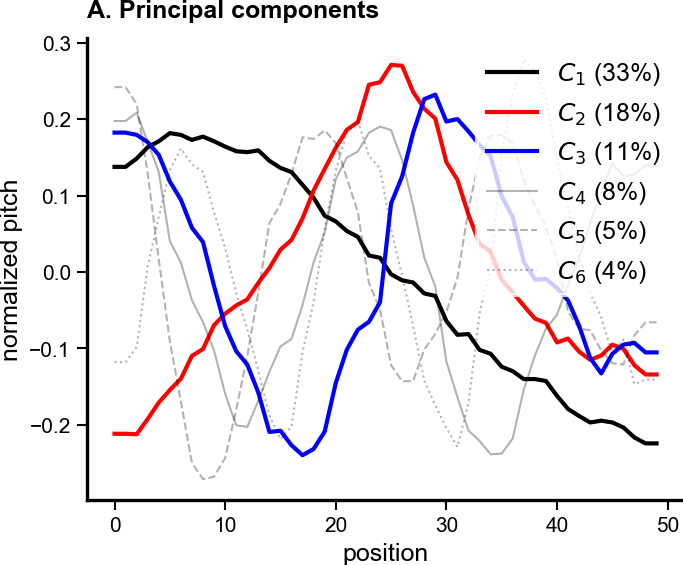

In [66]:
pca = PCA(n_components=6)
transformed_contours = pca.fit_transform(contours)

def plot_pca_points(contour_type):
    points = transformed_contours[contour_types == contour_type]
    plt.plot(points[:,0], points[:,1], '.', ms=2, alpha=.5, label=contour_type)

plt.figure(figsize=cm2inch(6,5))

# The principal components
# plt.subplot(131)
xs = np.arange(len(pca.components_[0]))
plt.plot(xs, pca.components_[0], 'k', lw=1, label=f'$C_1$ ({pca.explained_variance_ratio_[0]:.0%})')
plt.plot(xs, pca.components_[1], 'r', lw=1, label=f'$C_2$ ({pca.explained_variance_ratio_[1]:.0%})')
plt.plot(xs, pca.components_[2], 'b', lw=1, label=f'$C_3$ ({pca.explained_variance_ratio_[2]:.0%})')
plt.plot(xs, pca.components_[3], 'k-', lw=.5, alpha=.3, label=f'$C_4$ ({pca.explained_variance_ratio_[3]:.0%})')
plt.plot(xs, pca.components_[4], 'k--', lw=.5, alpha=.3, label=f'$C_5$ ({pca.explained_variance_ratio_[4]:.0%})')
plt.plot(xs, pca.components_[5], 'k:', lw=.5, alpha=.3, label=f'$C_6$ ({pca.explained_variance_ratio_[5]:.0%})')
plt.legend()
plt.ylabel('normalized pitch')
plt.xlabel('position')
plt.title('A. Principal components', x=0, ha='left')


/Users/Bas/repos/papers/fma-melodic-contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


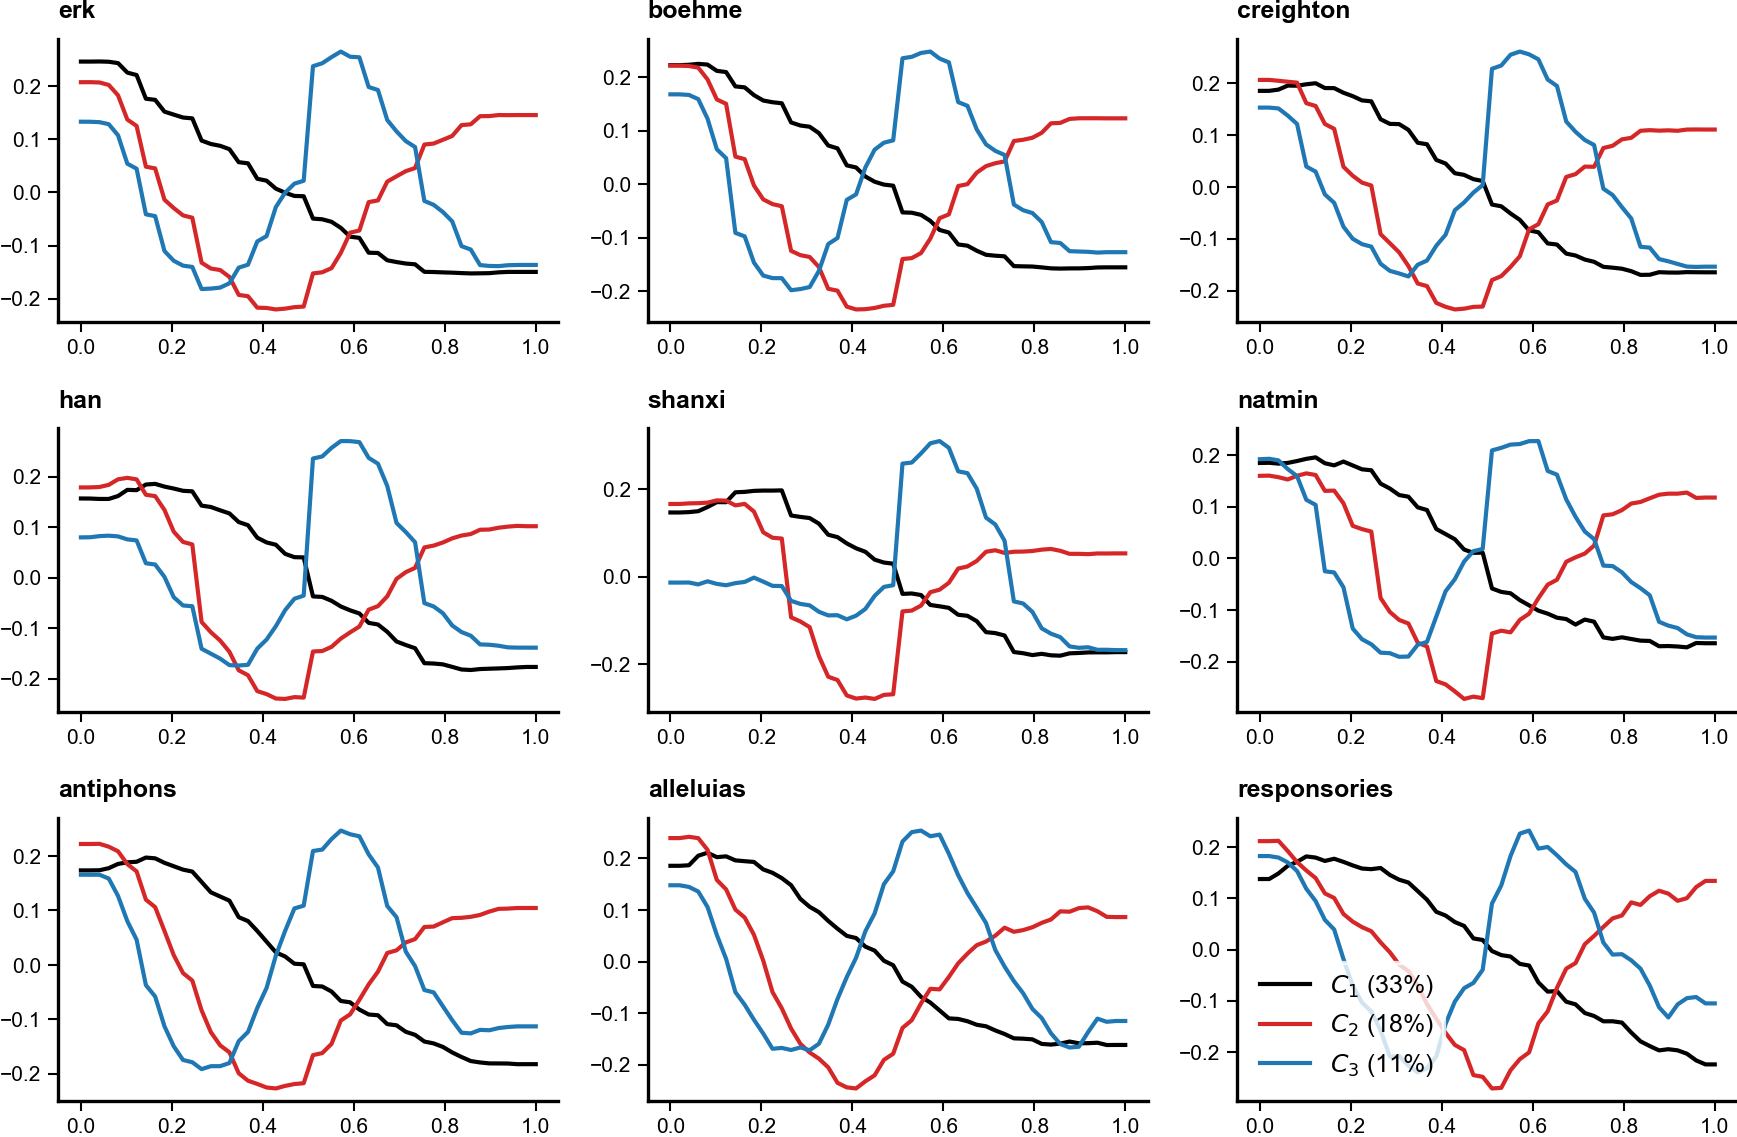

In [68]:
def show_pca(contours):
    pca = PCA(n_components=6)
    transformed_contours = pca.fit_transform(contours)
    xs = np.linspace(0, 1, 50)
    
    components = []
    for i in range(len(pca.components_)):
        comp = pca.components_[i]
        factor = -1 if comp[0] < comp[-1] else 1
        components.append(factor * comp)
        
    plt.plot(xs, components[0], c='k', lw=1, label=f'$C_1$ ({pca.explained_variance_ratio_[0]:.0%})')
    plt.plot(xs, components[1], c='C3', lw=1, label=f'$C_2$ ({pca.explained_variance_ratio_[1]:.0%})')
    plt.plot(xs, components[2], c='C0', lw=1, label=f'$C_3$ ({pca.explained_variance_ratio_[2]:.0%})')

title = lambda x: plt.title(x, x=0, ha='left')

plt.subplot(3, 3, 1)
contours = normalize_contours(dfs['erk'])
show_pca(contours)
title('erk')

plt.subplot(3, 3, 2)
contours = normalize_contours(dfs['boehme'])
show_pca(contours)
title('boehme')

plt.subplot(3, 3, 3)
contours = normalize_contours(dfs['creighton'])
show_pca(contours)
title('creighton')


plt.subplot(3, 3, 4)
contours = normalize_contours(dfs['han'])
show_pca(contours)
title('han')

plt.subplot(3, 3, 5)
contours = normalize_contours(dfs['shanxi'])
show_pca(contours)
title('shanxi')

plt.subplot(3, 3, 6)
contours = normalize_contours(dfs['natmin'])
show_pca(contours)
title('natmin')


plt.subplot(3, 3, 7)
contours = normalize_contours(dfs['liber-antiphons'])
show_pca(contours)
title('antiphons')

plt.subplot(3, 3, 8)
contours = normalize_contours(dfs['liber-alleluias'])
show_pca(contours)
title('alleluias')

plt.subplot(3, 3, 9)
contours = normalize_contours(dfs['liber-responsories'])
show_pca(contours)
title('responsories')

plt.legend()
# plt.ylabel('normalized pitch')
# plt.xlabel('position')
# plt.title('A. Principal components', x=0, ha='left')
plt.tight_layout()

## K-means

No handles with labels found to put in legend.


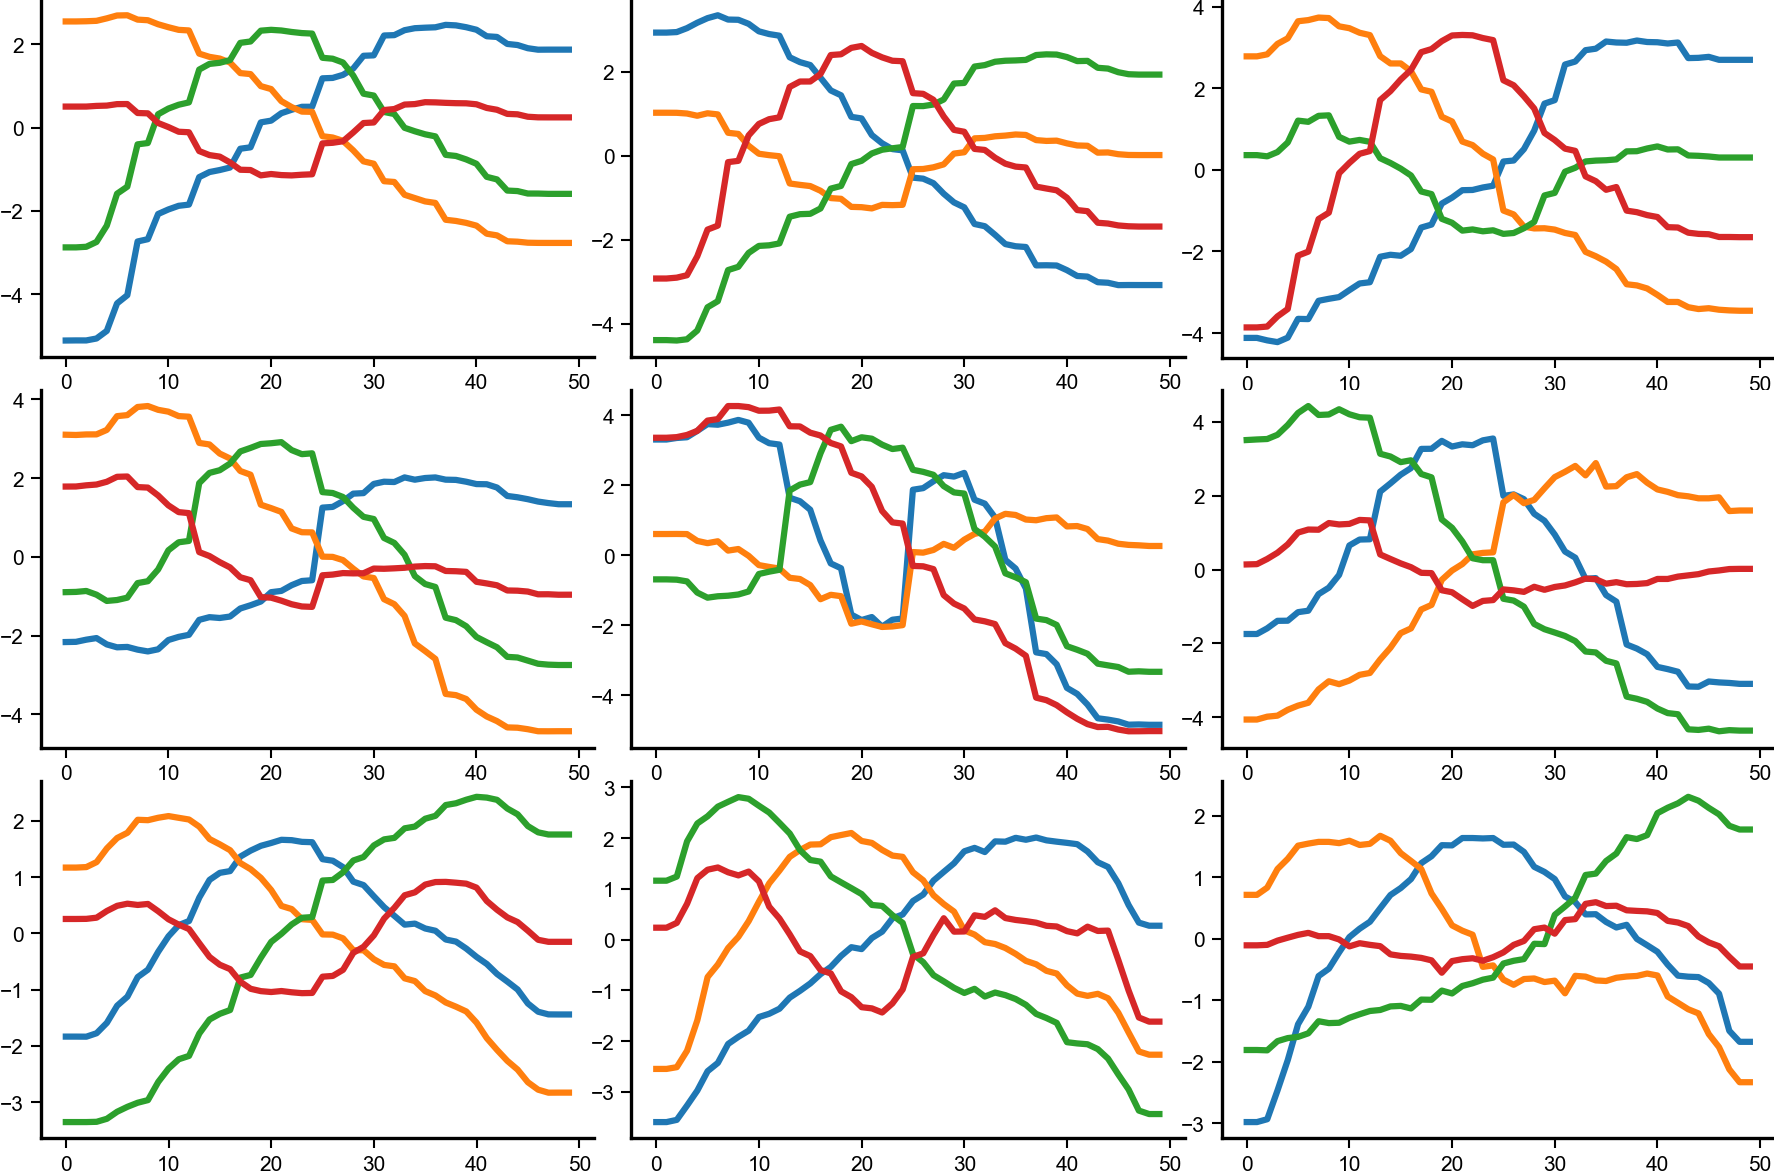

In [53]:
def show_k_means(contours, k=4):
    clusters, dist = scipy.cluster.vq.kmeans(contours, k)
    plt.plot(xs, clusters.T)

plt.subplot(3, 3, 1)
contours = normalize_contours(dfs['erk'])
show_k_means(contours)

plt.subplot(3, 3, 2)
contours = normalize_contours(dfs['boehme'])
show_k_means(contours)

plt.subplot(3, 3, 3)
contours = normalize_contours(dfs['creighton'])
show_k_means(contours)


plt.subplot(3, 3, 4)
contours = normalize_contours(dfs['han'])
show_k_means(contours)

plt.subplot(3, 3, 5)
contours = normalize_contours(dfs['shanxi'])
show_k_means(contours)

plt.subplot(3, 3, 6)
contours = normalize_contours(dfs['natmin'])
show_k_means(contours)


plt.subplot(3, 3, 7)
contours = normalize_contours(dfs['liber-antiphons'])
show_k_means(contours)

plt.subplot(3, 3, 8)
contours = normalize_contours(dfs['liber-alleluias'])
show_k_means(contours)

plt.subplot(3, 3, 9)
contours = normalize_contours(dfs['liber-responsories'])
show_k_means(contours)


plt.legend()
# plt.ylabel('normalized pitch')
# plt.xlabel('position')
# plt.title('A. Principal components', x=0, ha='left')


In [61]:
all_contours = np.concatenate([normalize_contours(dfs[dataset_id]) for dataset_id in dataset_ids])

In [62]:
all_contours.shape

(35239, 50)

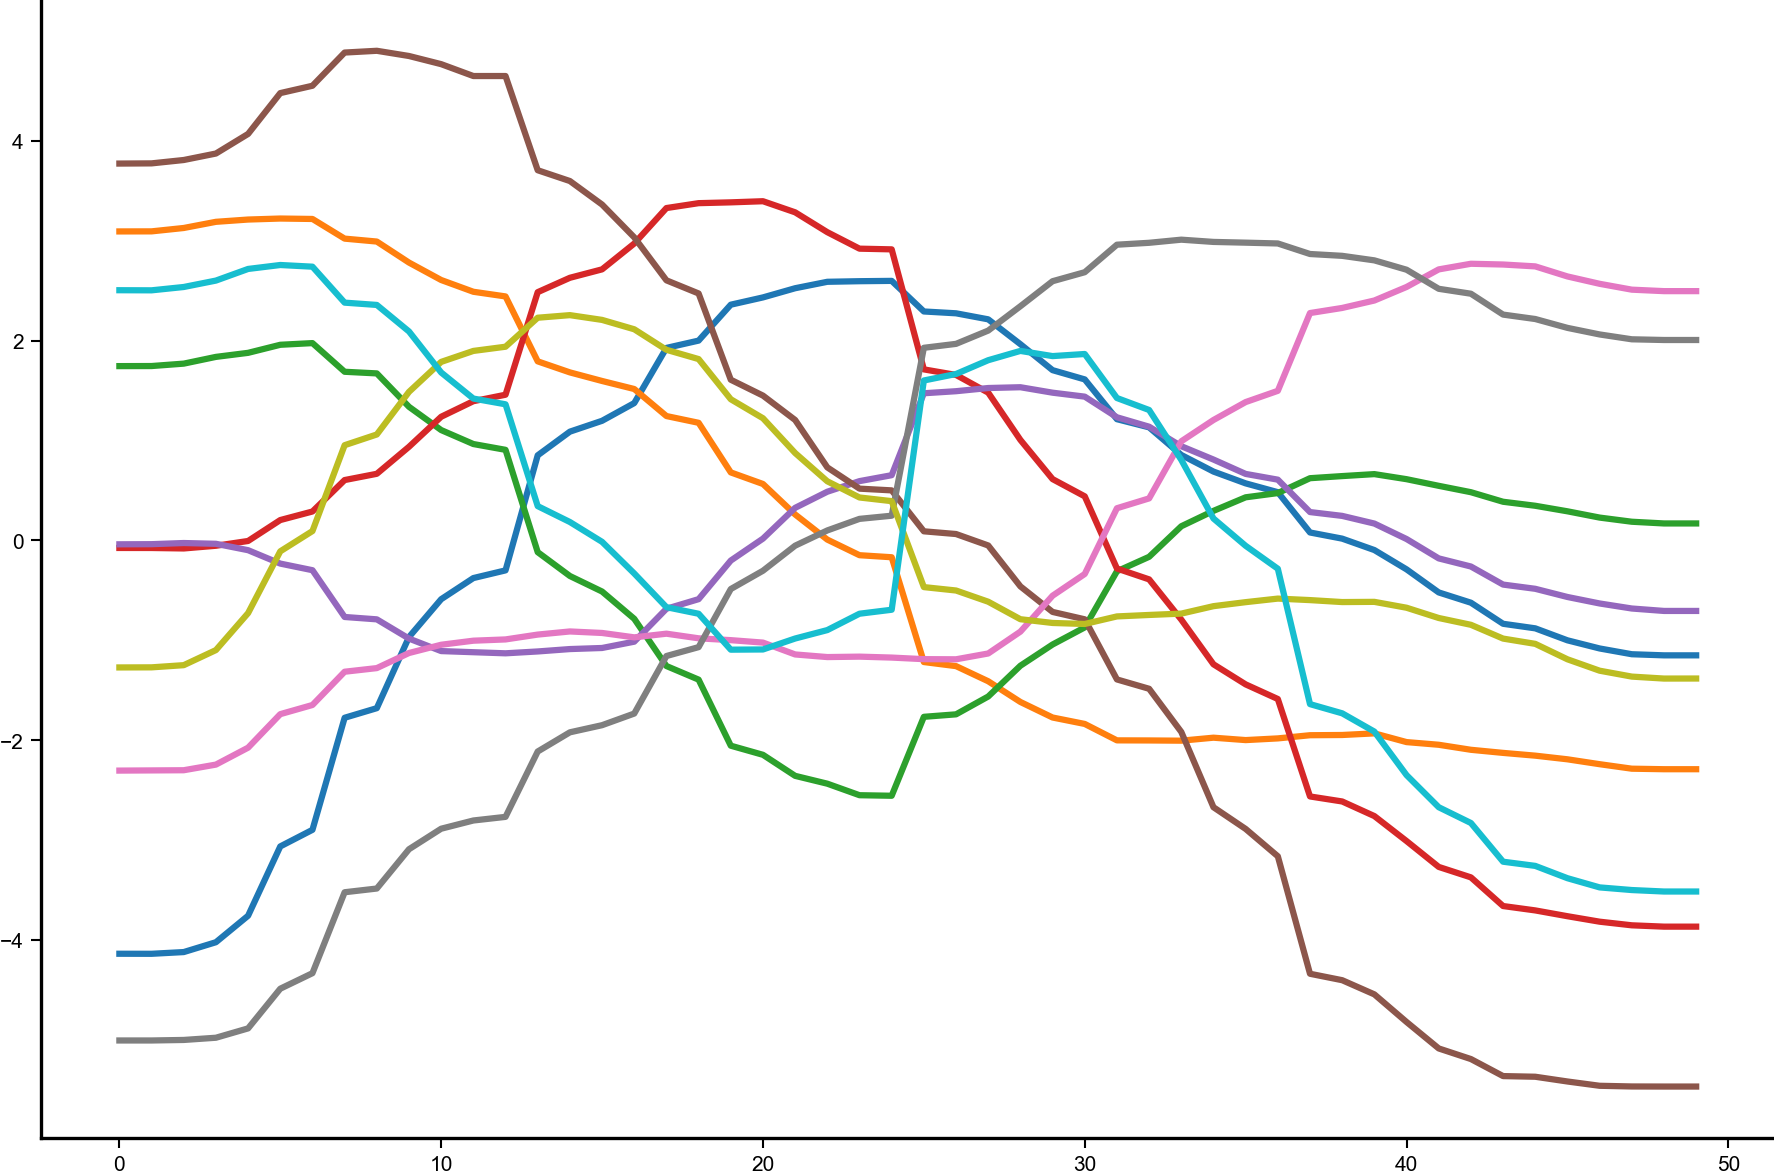

In [65]:
clusters, dist = scipy.cluster.vq.kmeans(all_contours, 10)
plt.plot(xs, clusters.T)

In [64]:
dist

13.444677397855267